# The first catalog for training must have the following properties

- A PEMD with the parameter priors of Conor,
- No shear
- 0 or 1 subhaloes of mass 10e11 and concetration prior set as Conor's one (i.e. r_max(mass low bound) to r_max(mass high bound)
- source made of multiple sersic profiles as in harvard paper
- Noise on top: poisson with very low sky background
- Which is the right size of the images in conor's paper?


- Dataloader: No random cropping. The offset of the position is not relavant in CNN (you sure?)


# Test the sources

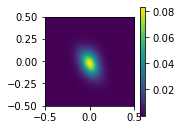

In [2]:
from catalog_manager.make_systems_dicts import generate_sersic_clumps_config
import json
from shared_utils import _grid_lens, recursive_to_tensor, _plot2D_on_grid, _rad_to_arcsec
from lensing_system.sources import SersicClumps
import matplotlib.pyplot as plt
import torch

precomp_dict={
    "D_s": 1500
}


sersic_dict_params=generate_sersic_clumps_config(precomp_dict=precomp_dict)
#print(json.dumps(sersic_dict_params, indent=4))
sersic_dict_tensor=recursive_to_tensor(sersic_dict_params, device="cpu")



my_grid=_grid_lens(1, 4000, device="cpu")

my_source=SersicClumps(sersic_dict_tensor, precomp_dict, device="cpu")

image= my_source.forward(my_grid)

plt.figure(figsize=(2, 2))
_plot2D_on_grid((image), _rad_to_arcsec(my_grid))

As we can see in the figures, the max of intensity (which is set to 1) is always far away. In theory, this may be just statistical noise, as we are calulating the mean over a pixel of intensity, and the max is just one point. But we are probably introducing some bias.

Now lets test how much time it takes to calculate 1000 images over a grid of 100x100

In [6]:
#generate differnt dicts to avoid eventual caching
precomp_dict={
    "D_s": 1500
}
dicts=[]
for i in range(10000):
    dicts.append(recursive_to_tensor(generate_sersic_clumps_config(precomp_dict=precomp_dict), device="cuda"))

#dicts_tensors=recursive_to_tensor(sersic_dict_params, device="cpu")
my_grid=_grid_lens(1, 100, device="cuda")


def eval_many_sources(dicts, my_grid=my_grid):

    for mydict in dicts:
        my_source=SersicClumps(mydict, precomp_dict, device="cuda")
        image= my_source.forward(my_grid)
        
        
# %prun eval_many_sources(dicts)





## Conclusion: this adds 1 second to a batch of 1000 images
which is comparable with the per batch time. I need to speed it up.

=== Flexible Catalog Analysis ===
Aggregated 18 scalar numeric keys and 5 pair keys across 4000 systems.


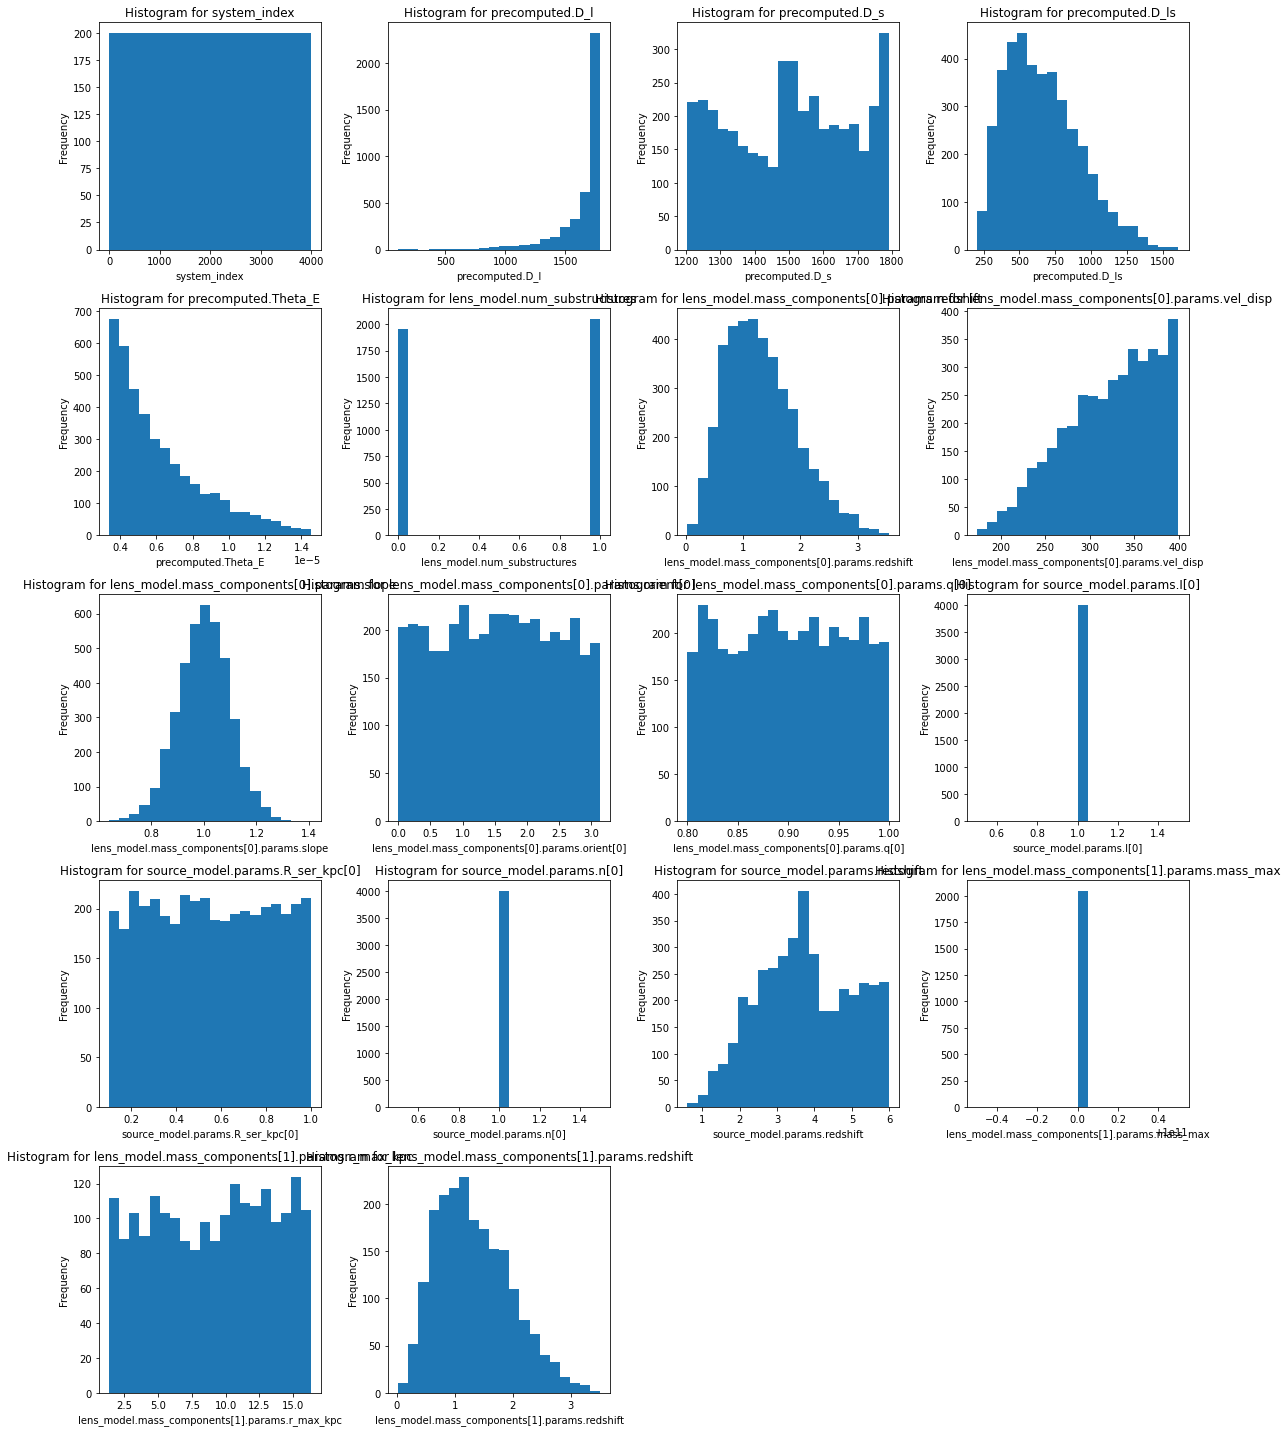

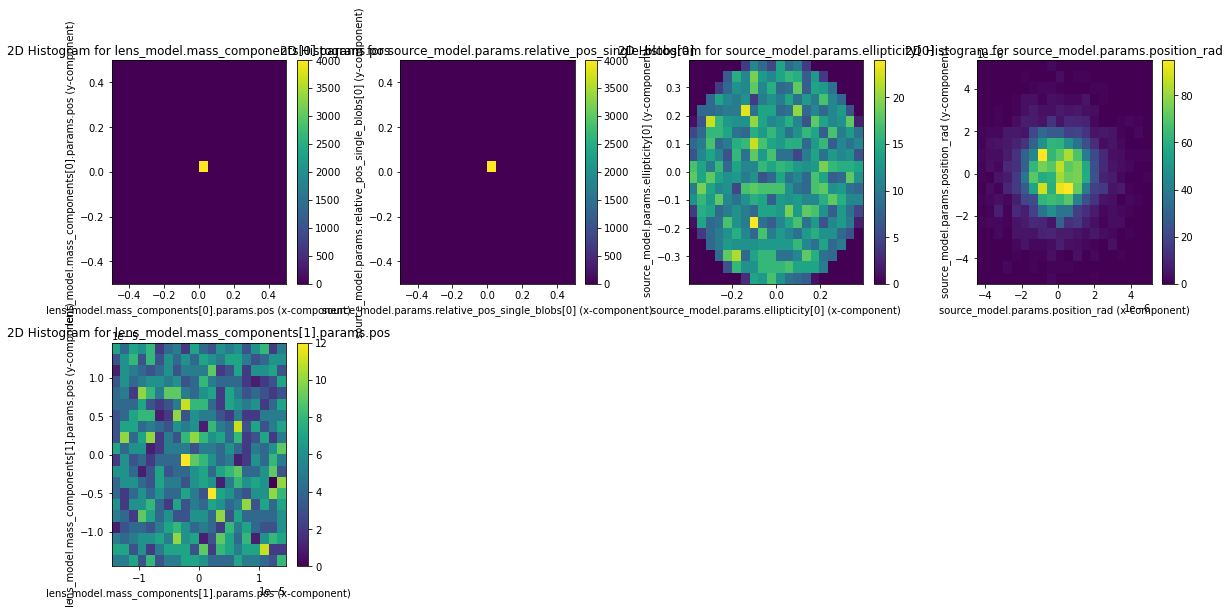

In [2]:
from catalog_manager import CatalogManager

my_catalog=CatalogManager("test_multiple_sersic_sources_test2_val")
my_catalog.visualize_statistics()